In [ ]:
import numpy as np

def read_elnes_file(filename):
    energies = []
    real_parts = []
    imag_parts = []
    data_started = False

    with open(filename, 'r') as file:
        for line in file:
            # Detect start of numerical data
            if line.strip().startswith("##  Energy, Re"):
                data_started = True
                continue
            if data_started:
                if line.strip() == "":
                    continue
                try:
                    parts = line.split()
                    energy = float(parts[0])
                    real = float(parts[1])
                    imag = float(parts[2])
                    energies.append(energy)
                    real_parts.append(real)
                    imag_parts.append(imag)
                except (ValueError, IndexError):
                    # Skip lines that don't match expected format
                    pass

    return np.array(energies), np.array(real_parts), np.array(imag_parts)

# Example usage
path = r"D:\school\AP MEP\eelsdata_wien2k\0deg\monolayer.elnes"
energies, real_spectrum, imag_spectrum = read_elnes_file(path)


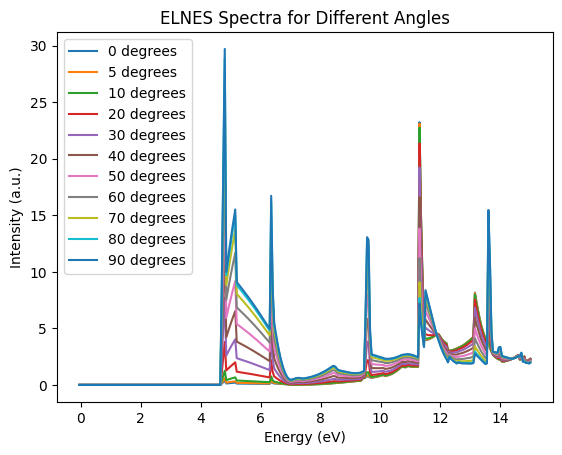

In [20]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

wien_telnes3_runs_angles= [0,5,10,20,30,40,50,60,70,80,90]

for angle in wien_telnes3_runs_angles[:]:
    path = f"D:/school/AP MEP/eelsdata_wien2k/{angle}deg/monolayer.elnes"
    energies, real_spectrum, imag_spectrum = read_elnes_file(path)
    # Apply Gaussian filter to smooth the spectrum
    # real_spectrum = gaussian_filter1d(real_spectrum, sigma=5)

    plt.plot(energies, real_spectrum, label=f"{angle} degrees")

plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (a.u.)")
plt.title("ELNES Spectra for Different Angles")
plt.legend()